# RandomForestClassifier

In [1]:
#23/12/2019
#iris dataset..apply for dct as well as logistic

In [2]:
#difference between linear and logistic
#Linear
#straight line, regression,dependency betwn depe and ind variable,y value can be anything
#logistic
#s-curve,no relation betwn dependent and independent, y value only 0 and 1, major use for classification

In [3]:
#RandomForest
#splitting data into multiple decision trees
#80% training->25-> dct->prediction
                #25->dct-pred
               # 25->dct->pre
                                      # merging all the abve pred
            

In [4]:
#first preferenced algorithm
#so many dcts, will take much time, disadvantage

[0.09343152 0.02697644 0.46202478 0.41756726]


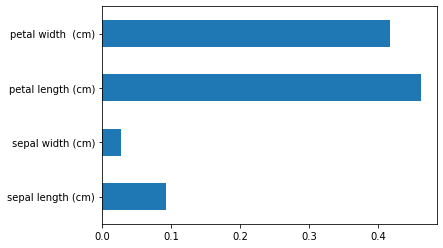

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

data=load_iris()

#correlation matrix
#old=data.corr()
#topold=old.index
#plt.figure(figsize=(20,20))
#sns.heatmap(data[topold].corr(),annot=True,cmap="RdYlGn")

df=pd.DataFrame(np.column_stack((data.data,data.target)), columns = data.feature_names+['target'])
df.head()
corr=df.corr()
#sns.heatmap(corr)

            
#we can use dct method also to define df
df=pd.DataFrame({'sepal length (cm)' : data.data[:,0],
                  'sepal width (cm)':  data.data[:,1],
                  'petal length (cm)' :data.data[:,2],
                 'petal width  (cm)' : data.data [:,3],
                 'species'       : data.target})
#convert numerical values of species in to string values
df["species"]=pd.Categorical.from_codes(data.target,data.target_names)
#print(df.head())

X=df.drop('species',axis=1)
Y= df['species']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1,test_size=0.2)
model=RFC(n_estimators=50)
model.fit(X_train,Y_train)

#feature selection
print(model.feature_importances_)
new=pd.Series(model.feature_importances_,index=X_train.columns)
new.plot(kind='barh')
plt.show()


Y_pred=model.predict(X_test)


#print(confusion_matrix(Y_test,Y_pred))
#print(classification_report(Y_test,Y_pred))
#print(accuracy_score(Y_test,Y_pred)*100)

#plt.scatter(X_test["sepal length (cm)"],Y_pred)
#plt.xlabel('petalLength')
#plt.ylabel('typeofflower')
#plt.title('Flower')
